In [6]:
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm


In [30]:
train_size = 800
test_size = 700
samples = test_size + train_size

belt_data = np.load('full_numpy_bitmap_belt.npy')[:samples]
bird_data = np.load('full_numpy_bitmap_bird.npy')[:samples]

belt_data = belt_data/255
bird_data = bird_data/255


1


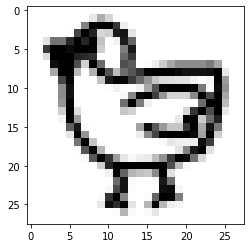

In [33]:
training_inputs = np.append(belt_data[:train_size,:], bird_data[:train_size,:], axis = 0)
training_outputs = np.array([0]*train_size+[1]*train_size)

testing_inputs = np.append(belt_data[train_size:,:], bird_data[train_size:,:], axis = 0)
testing_outputs = np.array([0]*test_size+[1]*test_size)


training_inputs, training_outputs = shuffle(training_inputs, training_outputs)
testing_inputs, testing_outputs = shuffle(testing_inputs, testing_outputs)

training_inputs = np.reshape(training_inputs, (train_size*2,1,28,28))
testing_inputs = np.reshape(testing_inputs, (test_size*2,1,28,28))

test = training_inputs[1,0]
plt.imshow(test, cmap='Greys')
print(training_outputs[1])

In [34]:
class ConvNetModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = torch.nn.Conv2d(1, 10, kernel_size=(3,3))
        self.f2 = torch.nn.Conv2d(10, 10, kernel_size=(3,3))
        self.l1 = torch.nn.Linear(10 * 5**2, 50)
        self.l2 = torch.nn.Linear(50, 3)
    
    def forward(self,x):
        
        cv1 = F.relu(self.f1(x))
        mp1 = torch.nn.MaxPool2d((2, 2))(cv1)
        cv2 = F.relu(self.f2(mp1))
        mp2 = torch.nn.MaxPool2d((2, 2))(cv2)
        
        flaten = torch.flatten(mp2, start_dim=1)
        
        dl1 = F.relu(self.l1(flaten))
        dl2 = F.softmax(self.l2(dl1), dim = 1)
        
        return(dl2)